# David Haase (NYC-MHTN-DS-042219)
#### Project 1: King County Housing Data Analysis 
The following jupyter notebook walks you through my project.

## Project Introduction
Import standard libraries in standard notation
## [code] Import Standard Libraries

In [88]:
# import libraries
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

## [code] Define Utility Functions

In [87]:
# Utilities
def to_dollars(value):
    return '${:,.2f}'.format(value)

def d_from_l(center, target, kms=True):
    
    # Converted from https://andrew.hedges.name/experiments/haversine/    
    if kms:
        R = 6373
    else:
        R = 3961
    
    dlon = target[1] - center[1] 
    dlat = target[0] - center[0] 
    a = (mt.sin(dlat/2))^2 + mt.cos(lat1) * mt.cos(lat2) * (mt.sin(dlon/2))^2 
    c = 2 * mt.atan2( mt.sqrt(a), mt.sqrt(1-a) ) 
    d = R * c
    return d

def get_data(data_file):
    try:
        data = pd.read_csv(data_file)
    except Exception as e:
        print(e) 
    return data

def get_clean_data(data):
#     flr_dummies = pd.get_dummies(data["floors"], prefix="flr")
#     data = pd.concat([data.loc[:,'price':'floors'], flr_dummies], axis=1)
#     data.drop('floors', axis=1, inplace = True)
#     data.head()
    
#     data.date = pd.to_datetime(data.date, format='%m/%d/%Y')
#     return pd.concat([data.loc[:,'price':'floors'], data.date], axis=1) 
    return data.loc[:,'price':'floors']

# def transform_data(dat):
#     import pandas as pd
#     import numpy as np
#     data = pd.read_csv("auto-mpg.csv") 
#     data['horsepower'].astype(str).astype(int)

#     acc = data["acceleration"]
#     logdisp = np.log(data["displacement"])
#     loghorse = np.log(data["horsepower"])
#     logweight= np.log(data["weight"])

#     scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
#     scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
#     scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
#     scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

#     data_fin = pd.DataFrame([])
#     data_fin["acc"]= scaled_acc
#     data_fin["disp"]= scaled_disp
#     data_fin["horse"] = scaled_horse
#     data_fin["weight"] = scaled_weight
#     cyl_dummies = pd.get_dummies(data["cylinders"], prefix="cyl")
#     yr_dummies = pd.get_dummies(data["model year"], prefix="yr")
#     orig_dummies = pd.get_dummies(data["origin"], prefix="orig")
#     mpg = data["mpg"]
#     data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)


def split_data(data, sample):
    cutoff = int(len(data)*sample)
    return (data[:cutoff],data[cutoff:])

## [code] Main program begins here
* Define your project variables
* Set up your sample and population data

In [54]:
# Define your project variables
data_file = 'kc_house_data.csv'
sample_percent = 0.8

#Scrape, clean and split the data into two sets
(df, test_df) = split_data(get_clean_data(get_data(data_file)), sample_percent)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


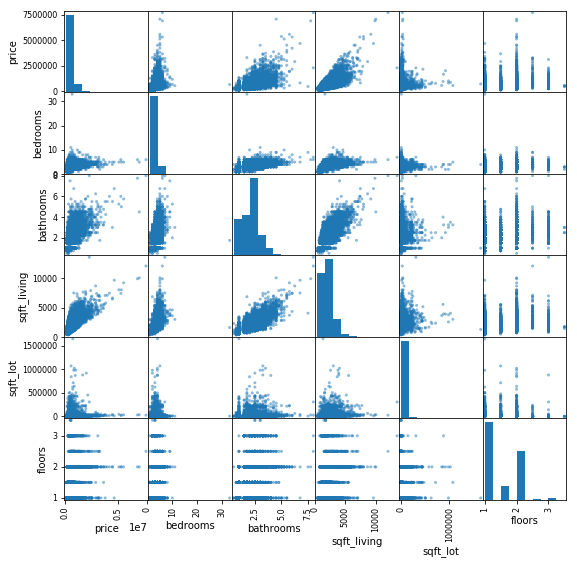

In [55]:
pd.plotting.scatter_matrix(df,figsize  = [9, 9]);

### Step 2: Plot histograms with kde overlay to check the distribution of the predictors

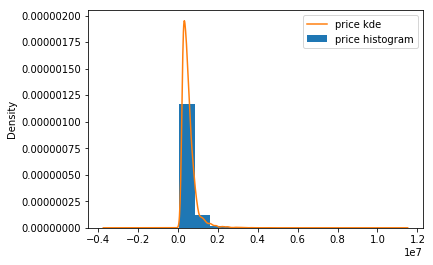

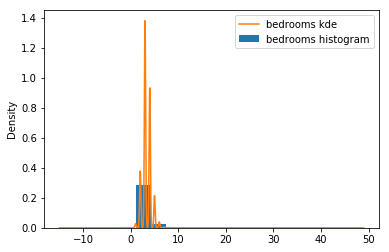

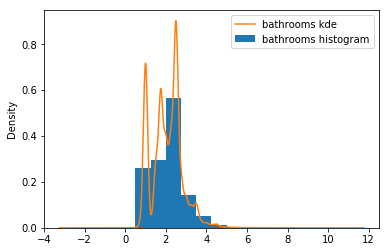

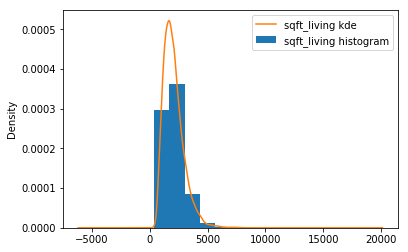

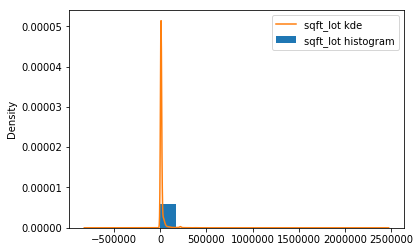

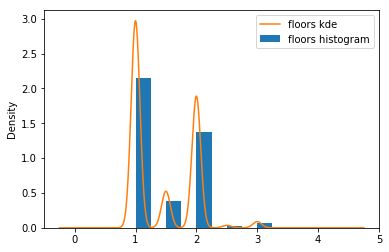

In [56]:
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

### Step 3: Test for the linearity assumption

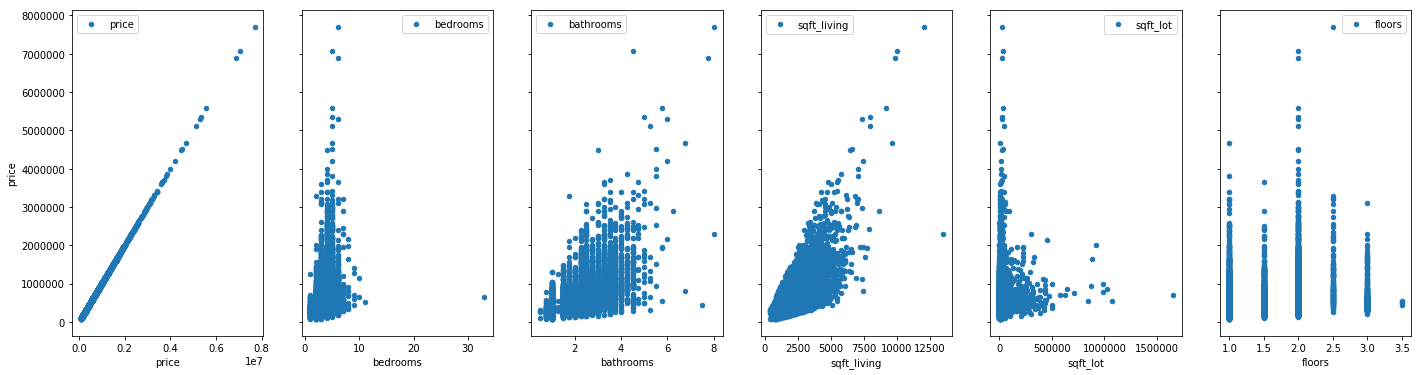

In [57]:
fig, axs = plt.subplots(1, len(df.columns), sharey=True, figsize=(24, 6))
for idx, channel in enumerate(df.columns):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

### Sort the Correlation Values to get the highest ones

In [86]:
df.corr().sort_values(by=['price'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
sqft_lot,0.092872,0.034030,0.099344,0.180971,1.000000,0.025278
floors,0.281570,0.211120,0.507195,0.401254,0.025278,1.000000
bedrooms,0.301986,1.000000,0.516501,0.564515,0.034030,0.211120
bathrooms,0.524217,0.516501,1.000000,0.762531,0.099344,0.507195
sqft_living,0.701285,0.564515,0.762531,1.000000,0.180971,0.401254
price,1.000000,0.301986,0.524217,0.701285,0.092872,0.281570


### Step 4 & 5: Run a simple regression in Statsmodels with each variable as a predictor and get the summary

In [79]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.672e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        10:24:14   Log-Likelihood:            -2.4000e+05
No. Observations:               17277   AIC:                         4.800e+05
Df Residuals:                   17275   BIC:                         4.800e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.024e+04   4931.782    -10.187      0.000   -5.99e+04   -4.06e+04
sqft_living   284.1154      2.197    129.296      0.000     279.808     288.423
==============================================================================
Omnibus:                    12232.278   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           519116.372
Skew:                           2.909   Prob(JB):                         0.00
Kurtosis:                      29.216   Cond. No.                     5.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 6: Draw a prediction line with data points on a scatter plot for X ([variables]) and Y (Price)

   sqft_living
0          370
1        13540
0    5.488280e+04
1    3.796683e+06
dtype: float64


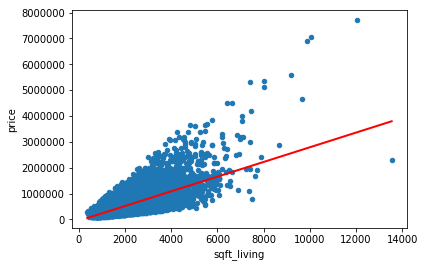

In [80]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'sqft_living': [df.sqft_living.min(), df.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
df.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

### Step 7: Visualize the error term for variance and heteroscedasticity

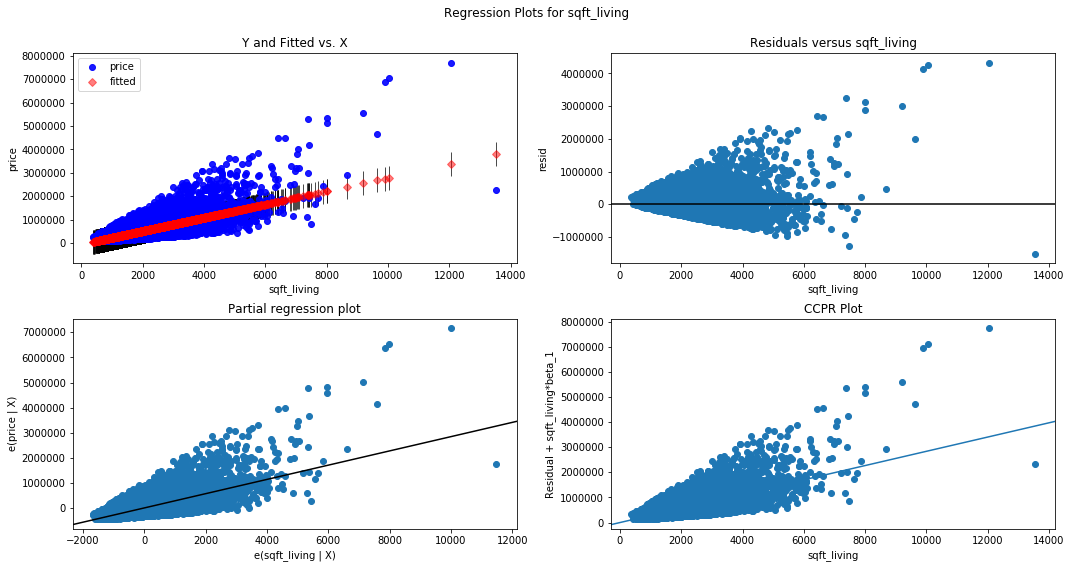

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.show()

### Step 8: Check the normality assumptions by creating a QQ-plotsticity

/Users/davidhaase/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


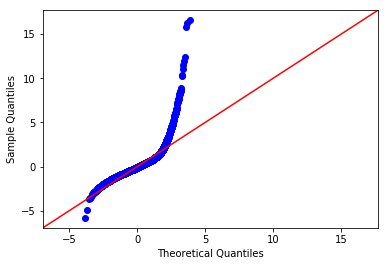

In [82]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [63]:
# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    
    # Use the slope formula above and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

284.1154376853551

In [64]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X, Y)
m, c

(284.1154376853551, -50239.90826621419)

In [65]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

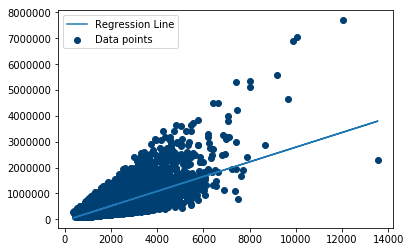

In [66]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()
plt.show()

In [67]:
x_new = 6000
y_predicted = (m*x_new)+c
y_predicted

1654452.7178459165

### Step 8: Check the normality assumptions by creating a QQ-plot

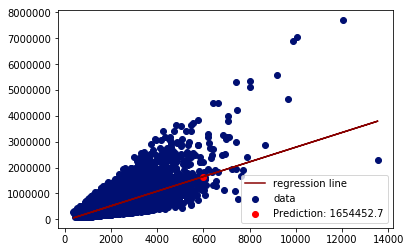

In [68]:
plt.scatter(X,Y,color='#000F72',label='data')
plt.plot(X, regression_line, color='#880000', label='regression line')
plt.scatter(x_new,y_predicted,color='r',label='Prediction: '+ str(np.round(y_predicted,1)))
plt.legend(loc=4)
plt.show()

### Rinse and Repeat

In [78]:
# f = 'sales~radio'
# model = smf.ols(formula=f, data=data).fit()
# print ('R-Squared:',model.rsquared)
# print (model.params)
# X_new = pd.DataFrame({'radio': [data.radio.min(), data.radio.max()]});
# preds = model.predict(X_new)
# data.plot(kind='scatter', x='radio', y='sales');
# plt.plot(X_new, preds, c='red', linewidth=2);
# plt.show()
# fig = plt.figure(figsize=(15,8))
# fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
# plt.show()
# import scipy.stats as stats
# residuals = model.resid
# fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
# fig.show()

Now let's check the fit

In [69]:
def sq_err(y_a, y_b):
        
    squarred_error = 0
    for x in range(0, len(y_a)):
        squarred_error += (y_a[x] - y_b[x]) ** 2
    return squarred_error

# Check the output with some toy data
Y_a = np.array([1,3,5,7])
Y_b = np.array([1,4,5,8])

sq_err(Y_a, Y_b)

2

In [70]:
# Calculate Y_mean , squared error for regression and mean line , and calculate r-squared

def r_squared(y_real, y_predicted):
    
    # calculate the numerator
    num = sq_err(y_real, y_predicted)
    # calculate the denominator
    denom = 0
    for x in y_real:
        denom += (x - y_real.mean()) ** 2
    return 1 - (num / denom)

# Check the output with some toy data
Y = np.array([1,3,5,7])
Y_pred = np.array([1,5,5,10])

r_squared(Y, Y_pred)

0.35

In [71]:
def plot_reg(X,Y,Y_pred):
    plt.scatter(X,Y,color='#003F72',label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

Basic Regression Diagnostics
----------------------------
Slope: 1.0
Y-Intercept: 0.0
R-Squared: 1.0
----------------------------
Model: Y = 1.0 * X + 0.0


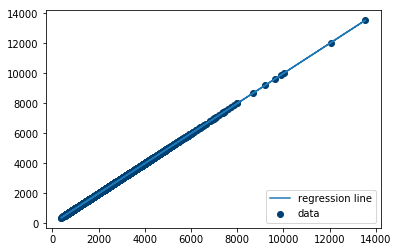

In [73]:
Y = df.sqft_living
m, c = best_fit(X,Y)

Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y,Y_pred)

print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m,2))
print ('Y-Intercept:', round(c,2))
print ('R-Squared:', round(r_squared,2))
print ('----------------------------')
print ('Model: Y =',round(m,2),'* X +', round(c,2))

plot_reg(X,Y,Y_pred)

### Multiple Regression